### Vídeo Não-Listado no Youtube
[Link do Vídeo](https://youtu.be/IX-lnC9HT_E)

# Importing libraries

In [1]:
import pandas as pd 
import numpy as np
import os
import pickle
import time
import matplotlib.pyplot as plt
from scipy.stats import randint, uniform
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report, make_scorer
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

# Files Path

In [2]:
file_path = r'C:\Users\julia\OneDrive\Documentos\MESTRADO\Aprendizado de Máquina\Trabalho 1'

# Part 1 - Loan Payment Prediction




## Importing and checking files

In [3]:
# Reading files
df_train = pd.read_csv(file_path+'\Crédito\credtrain.txt', sep='\t',header=None)
df_test = pd.read_csv(file_path+'\Crédito\credtest.txt', sep='\t',header=None)

In [4]:
# Displaying data

display(df_train.head(3))
display(df_test.head(3))

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,0,360,0,313,9,52,0,25,48,0,1
1,0,0,350,1,468,10,65,0,33,6,0,1
2,0,0,1100,0,829,9,125,0,56,48,0,1


,0,1,2,3,4,5,6,7,8,9,10,11
0,0,2,500,1,618,10,85,0,36,6,0,0
1,1,0,813,0,552,4,119,0,43,48,119,1
2,3,0,350,0,488,12,66,0,43,0,0,1


In [5]:
# Checking columns dtypes

display(df_train.info())

print(' ')

display(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       1500 non-null   int64
 1   1       1500 non-null   int64
 2   2       1500 non-null   int64
 3   3       1500 non-null   int64
 4   4       1500 non-null   int64
 5   5       1500 non-null   int64
 6   6       1500 non-null   int64
 7   7       1500 non-null   int64
 8   8       1500 non-null   int64
 9   9       1500 non-null   int64
 10  10      1500 non-null   int64
 11  11      1500 non-null   int64
dtypes: int64(12)
memory usage: 140.8 KB


None

 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       577 non-null    int64
 1   1       577 non-null    int64
 2   2       577 non-null    int64
 3   3       577 non-null    int64
 4   4       577 non-null    int64
 5   5       577 non-null    int64
 6   6       577 non-null    int64
 7   7       577 non-null    int64
 8   8       577 non-null    int64
 9   9       577 non-null    int64
 10  10      577 non-null    int64
 11  11      577 non-null    int64
dtypes: int64(12)
memory usage: 54.2 KB


None

In [6]:
# Renaming columns

df_train.rename(columns={
    0: 'ESCT',
    1: 'NDEP',
    2: 'RENDA',
    3: 'TIPOR',
    4: 'VBEM',
    5: 'NPARC',
    6: 'VPARC',
    7: 'TEL',
    8: 'IDADE',
    9: 'RESMS',
    10: 'ENTRADA',
    11: 'CLASSE'
}, inplace=True)

df_test.rename(columns={
    0: 'ESCT',
    1: 'NDEP',
    2: 'RENDA',
    3: 'TIPOR',
    4: 'VBEM',
    5: 'NPARC',
    6: 'VPARC',
    7: 'TEL',
    8: 'IDADE',
    9: 'RESMS',
    10: 'ENTRADA',
    11: 'CLASSE'
}, inplace=True)

In [7]:
# Checking null values

print('Dados Treino - Nulos')
display(df_train.isnull().sum())
print(' ')
print('Dados Teste - Nulos')
display(df_test.isnull().sum())

Dados Treino - Nulos


ESCT       0
NDEP       0
RENDA      0
TIPOR      0
VBEM       0
NPARC      0
VPARC      0
TEL        0
IDADE      0
RESMS      0
ENTRADA    0
CLASSE     0
dtype: int64

 
Dados Teste - Nulos


ESCT       0
NDEP       0
RENDA      0
TIPOR      0
VBEM       0
NPARC      0
VPARC      0
TEL        0
IDADE      0
RESMS      0
ENTRADA    0
CLASSE     0
dtype: int64

In [8]:
# Checking the balance of classes

# Displaying the count of each class in the training dataset
display(df_train['CLASSE'].value_counts())

print(' ')

# Displaying the count of each class in the test dataset
display(df_test['CLASSE'].value_counts())

CLASSE
0    785
1    715
Name: count, dtype: int64

CLASSE
0    306
1    271
Name: count, dtype: int64

## Preparing the training and test data




In [9]:
# One-Hot Encoding for categorical variables

# Applying one-hot encoding to categorical variables in the training dataset ('ESCT', 'TIPOR', 'TEL')
df_train_encoded = pd.get_dummies(df_train, columns=['ESCT', 'TIPOR', 'TEL'], dtype=int, drop_first=True) #Avoiding dummie variable trap

# Applying one-hot encoding to categorical variables in the test dataset ('ESCT', 'TIPOR', 'TEL')
df_test_encoded = pd.get_dummies(df_test, columns=['ESCT', 'TIPOR', 'TEL'], dtype=int, drop_first=True)

In [10]:
# Splitting data and scaling features

# Separating features (independent variables) from the target variable in the training dataset
X_train = df_train_encoded.drop(columns='CLASSE', axis=1)  # Features
y_train = df_train_encoded['CLASSE']  # Target variable

# Separating features from the target variable in the test dataset
X_test = df_test_encoded.drop(columns='CLASSE', axis=1)  # Features
y_test = df_test_encoded['CLASSE']  # Target variable

# Standardizing features using StandardScaler
scaler = StandardScaler()

# Scaling features of the training dataset
X_train_scaled = scaler.fit_transform(X_train)

# Scaling features of the test dataset using the same scaler fitted to the training dataset
X_test_scaled = scaler.transform(X_test)

## Testing algorithms and obtaining results




Classification Report - LogisticRegression(max_iter=1000):
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       306
           1       0.93      0.82      0.87       271

    accuracy                           0.89       577
   macro avg       0.89      0.88      0.89       577
weighted avg       0.89      0.89      0.89       577

Confusion Matrix - LogisticRegression(max_iter=1000):
[[290  16]
 [ 49 222]]
 
------------------
 
Classification Report - DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       306
           1       0.84      0.87      0.85       271

    accuracy                           0.86       577
   macro avg       0.86      0.86      0.86       577
weighted avg       0.86      0.86      0.86       577

Confusion Matrix - DecisionTreeClassifier():
[[262  44]
 [ 36 235]]
 
------------------
 
Classification Report - RandomForestClassifier

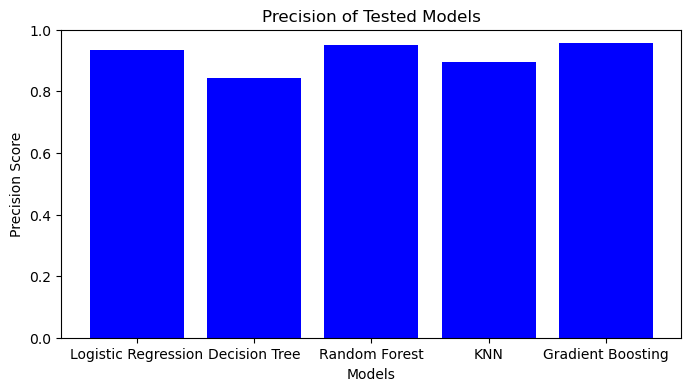

In [11]:
# Logistic Regression
# Defining max_iter to ensure convergence, as it did not occur with the default model settings
logistic_reg_model = LogisticRegression(max_iter=1000)

# Decision Tree
decision_tree_model = DecisionTreeClassifier()

# Random Forest
random_forest_model = RandomForestClassifier()

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()

# Gradient Boosting
gradient_boost_model = GradientBoostingClassifier()

# List of model names
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'Gradient Boosting']

# List to store precision scores
precision_scores = []

# Iterating over each model
for model in [logistic_reg_model, decision_tree_model, random_forest_model, knn_model, gradient_boost_model]:
    # Training the model
    model.fit(X_train_scaled, y_train)
    
    # Making predictions
    predictions = model.predict(X_test_scaled)
    
    # Calculating precision score
    precision = precision_score(y_test, predictions)
    
    # Printing classification report and confusion matrix
    print(f'Classification Report - {model}:')
    print(classification_report(y_test, predictions))
    print(f'Confusion Matrix - {model}:')
    print(confusion_matrix(y_test, predictions))
    print(' ')
    print('------------------')
    print(' ')
    
    # Appending precision score to the list
    precision_scores.append(precision)

# Plotting precision scores of the tested models
plt.figure(figsize=(8, 4))
plt.bar(model_names, precision_scores, color='blue')
plt.title('Precision of Tested Models')
plt.xlabel('Models')
plt.ylabel('Precision Score')
plt.ylim(0, 1)
plt.show()

### Conclusions

- **Logistic Regression**: Achieved an accuracy of 89%, with a precision of 86% for class 0 and 93% for class 1.
- **Decision Tree Classifier**: Achieved an accuracy of 86%, exhibiting a precision of 88% for class 0 and 83% for class 1.
- **Random Forest Classifier**: Achieved an accuracy of 90%, with a precision of 87% for class 0 and 95% for class 1.
- **K-Nearest Neighbors Classifier**: Achieved an accuracy of 87%, demonstrating a precision of 84% for class 0 and 90% for class 1.
- **Gradient Boosting Classifier**: Achieved an accuracy of 90%, with a precision of 86% for class 0 and 96% for class 1.

Among these algorithms, the Random Forest Classifier displayed the highest accuracy, closely followed by the Gradient Boosting Classifier.

# Part 2 - Diamond Price Accuracy




## Reading file

In [12]:
df_diamonds = pd.read_csv(file_path+'\Diamantes\diamonds.csv', sep=',',index_col=0)

## Data Pre-Processing

In [13]:
#Displaying first 3 rows and dtypes

display(df_diamonds.head(3))
print(' ')
display(df_diamonds.info())

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


 
<class 'pandas.core.frame.DataFrame'>
Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


None

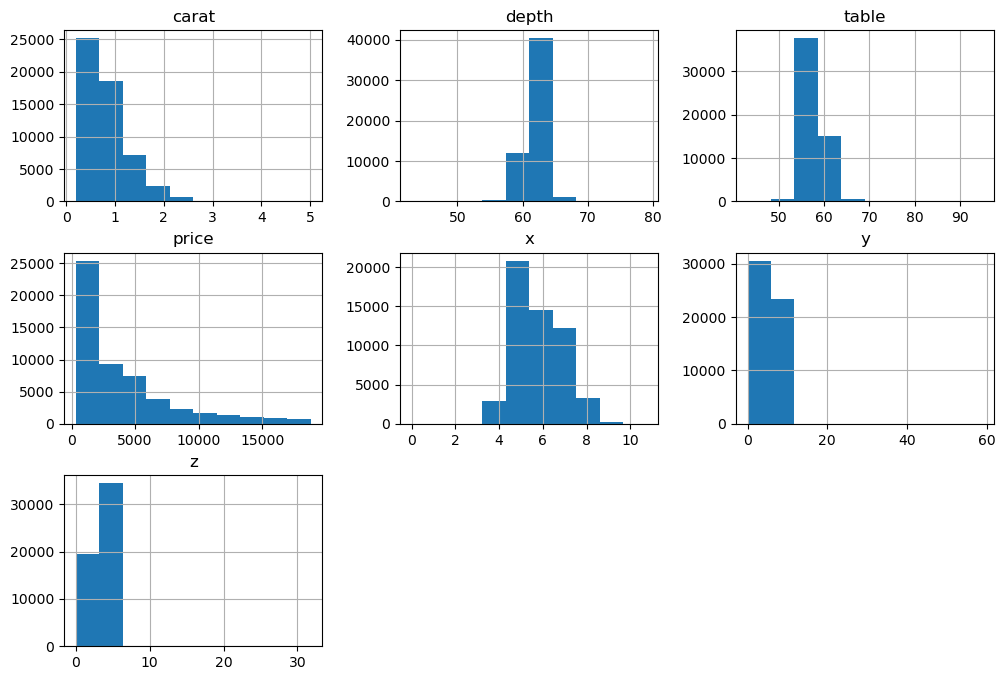

In [14]:
# Plotting histograms for the diamond dataset to observe the distribution of each numerical feature

df_diamonds.hist(figsize=(12, 8))
plt.show()

In [15]:
# Checking for null values
display(df_diamonds.isnull().any())

carat      False
cut        False
color      False
clarity    False
depth      False
table      False
price      False
x          False
y          False
z          False
dtype: bool

In [16]:
# Checking for 0 values
display((df_diamonds == 0).any())

carat      False
cut        False
color      False
clarity    False
depth      False
table      False
price      False
x           True
y           True
z           True
dtype: bool

In [17]:
# Summing rows where at least one of the columns (x, y, and z) are 0
zero_rows_sum = (df_diamonds[['x', 'y', 'z']] == 0).any(axis=1).sum()
# Calculating proportion over the entire df_diamonds dataset
proportion_zero_rows = zero_rows_sum / len(df_diamonds)
print("Proportion of rows with at least one zero value in columns x, y, or z:", proportion_zero_rows)

Proportion of rows with at least one zero value in columns x, y, or z: 0.0003707823507601038


In [18]:
# Since x, y, and z represent diamond dimensions, they cannot have a 0 value. 
#However, a low proportion of the dataset contains rows with at least one 0 value in columns x, y, or z. 
#Thus, I decided to remove these rows.

df_diamonds = df_diamonds[(df_diamonds['x'] != 0) & (df_diamonds['y'] != 0) & (df_diamonds['z'] != 0)]
print(df_diamonds.shape)

(53920, 10)


In [19]:
# Manual encoding of categorical variables to ensure correct order between the categorical features

# List of categorical features
cat_features = ['cut', 'color', 'clarity']

# Creating mappings for desired orders
cut_mapping = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
color_mapping = {'J': 0, 'I': 1, 'H': 2, 'G': 3, 'F': 4, 'E': 5, 'D': 6}
clarity_mapping = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}

# Applying mappings to categorical variables
df_diamonds['cut_encoded'] = df_diamonds['cut'].map(cut_mapping)
df_diamonds['color_encoded'] = df_diamonds['color'].map(color_mapping)
df_diamonds['clarity_encoded'] = df_diamonds['clarity'].map(clarity_mapping)

# Dropping the categorical columns
df_diamonds_encoded = df_diamonds.drop(columns=cat_features)

# Displaying the resulting dataframe
display(df_diamonds_encoded)

,carat,depth,table,price,x,y,z,cut_encoded,color_encoded,clarity_encoded
1,0.23,61.5,55.0,326,3.95,3.98,2.43,4,5,1
2,0.21,59.8,61.0,326,3.89,3.84,2.31,3,5,2
3,0.23,56.9,65.0,327,4.05,4.07,2.31,1,5,4
4,0.29,62.4,58.0,334,4.20,4.23,2.63,3,1,3
5,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,1
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,60.8,57.0,2757,5.75,5.76,3.50,4,6,2
53937,0.72,63.1,55.0,2757,5.69,5.75,3.61,1,6,2
53938,0.70,62.8,60.0,2757,5.66,5.68,3.56,2,6,2
53939,0.86,61.0,58.0,2757,6.15,6.12,3.74,3,2,1


## Preparing the training and test data

In [20]:
# Preparing training and test data
X_diamonds = df_diamonds_encoded.drop(columns='price',axis=1)
y_diamonds = df_diamonds_encoded['price']

# Split the data into training and testing sets
X_train_diamonds, X_test_diamonds, y_train_diamonds, y_test_diamonds = train_test_split(X_diamonds, y_diamonds,
                                                                                        test_size=0.2, random_state=42)
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_diamonds_scaled = scaler.fit_transform(X_train_diamonds)
X_test_diamonds_scaled = scaler.transform(X_test_diamonds)

## Testing algorithms and obtaining results

In [21]:
# Evaluating results

# Linear Regression
linear_reg_model = LinearRegression()
# Lasso Regression
lasso_model = Lasso()
# Decision Tree Regressor
decision_tree_model = DecisionTreeRegressor()
# Random Forest Regressor
random_forest_model = RandomForestRegressor()
# K-Nearest Neighbors Regressor
knn_model = KNeighborsRegressor()
# Gradient Boosting Regressor
gradient_boost_model = GradientBoostingRegressor()

models = [linear_reg_model, lasso_model, decision_tree_model, random_forest_model, knn_model, gradient_boost_model]

for i, model in enumerate(models):
    model.fit(X_train_diamonds_scaled, y_train_diamonds)
    predictions = model.predict(X_test_diamonds_scaled)
    mse = mean_squared_error(y_test_diamonds, predictions)
    r2 = r2_score(y_test_diamonds, predictions)
    
    print(f"\nModel {i+1}: {model.__class__.__name__}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R^2 Score: {r2:.4f}")


Model 1: LinearRegression
Mean Squared Error: 1443338.7844
R^2 Score: 0.9100


C:\Users\julia\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.501e+08, tolerance: 6.843e+07
  model = cd_fast.enet_coordinate_descent(



Model 2: Lasso
Mean Squared Error: 1427509.8473
R^2 Score: 0.9110

Model 3: DecisionTreeRegressor
Mean Squared Error: 526304.7577
R^2 Score: 0.9672

Model 4: RandomForestRegressor
Mean Squared Error: 264440.9033
R^2 Score: 0.9835

Model 5: KNeighborsRegressor
Mean Squared Error: 488688.1665
R^2 Score: 0.9695

Model 6: GradientBoostingRegressor
Mean Squared Error: 378461.1251
R^2 Score: 0.9764


In [23]:
#Re-appling Lasso Model:

# Lasso Model

lasso_model = Lasso(alpha = 0.1, max_iter=2000)
lasso_model.fit(X_train_diamonds, y_train_diamonds)
predictions = lasso_model.predict(X_test_diamonds)

mse = mean_squared_error(y_test_diamonds, predictions)
r2 = r2_score(y_test_diamonds, predictions)
print("Model: Lasso")
print(f'Mean Squared Error: {mse:.4f}')
print(f'R^2 Score: {r2:.4f}')

Model: Lasso
Mean Squared Error: 1437633.8675
R^2 Score: 0.9103


## Conclusions

**Linear Regression:** The Linear Regression model achieved a moderately high R² of 0.9100, indicating that approximately 91% of the variance in the target variable is explained by the features. However, the Mean Squared Error (MSE) is relatively high at 1443338.7844, suggesting that the model's predictions have considerable variance from the actual values.

**Decision Tree Regressor:** The Decision Tree model outperformed Linear Regression with a significantly lower MSE of 523207.9199 and a higher R² of 0.9674. It demonstrates a strong ability to capture the underlying patterns in the data, resulting in more accurate predictions.

**Random Forest Regressor:** The Random Forest model further improves upon the performance of the Decision Tree model, achieving an even lower MSE of 268037.6659 and a higher R² of 0.9833. This indicates that the ensemble of decision trees in the Random Forest leads to better generalization and prediction accuracy.

**K-Nearest Neighbors Regressor:** The KNN model performs reasonably well, with an MSE of 488688.1665 and an R² of 0.9695. It demonstrates the ability to capture local patterns in the data but may not generalize as effectively as ensemble methods like Random Forest.

**Lasso Regression:** The Lasso Regression model achieved similar performance to Linear Regression, with a slightly lower MSE of 1437633.8675 and a comparable R² of 0.9103. After receiving the warning that the default model did not converge, the parameters alpha and max_iter were changed. The alpha parameter controls the strength of the regularization, set to 0.1 indicating moderate regularization. Additionally, the max_iter parameter specifies the maximum number of iterations for the optimization algorithm, set to 2000 to ensure convergence. This indicates that the regularization imposed by Lasso did not significantly improve the model's predictive ability compared to ordinary linear regression.

**Gradient Boosting Regressor:** The Gradient Boosting model achieved an MSE of 378461.1251 and an R² of 0.9764. This indicates that the model was able to capture the patterns in the data well, presenting a relatively low MSE and a high R², indicating a good ability to explain the variability in the dependent variable.

**Impact of Model Complexity:**

Generally, more complex models such as Random Forest Regressor and Gradient Boosting Regressor tend to outperform simpler models like Linear Regression and K-Nearest Neighbors Regressor in terms of both MSE and R² score. This suggests that the added complexity allows these models to capture more intricate patterns in the data.

**Trade-off Between Bias and Variance:**

While complex models may yield lower MSE and higher R² scores on the training data, there is a risk of overfitting, leading to poor generalization on unseen data. On the other hand, simpler models may have higher bias but lower variance, resulting in better generalization but potentially poorer performance on the training data.

**Model Selection Considerations:**

The choice of the most suitable model depends on the specific requirements of the problem at hand. If interpretability and computational efficiency are prioritized, simpler models like Linear Regression or Lasso may be preferred despite their slightly higher MSE. Conversely, if predictive accuracy is paramount and computational resources allow, more complex models like Random Forest or Gradient Boosting may be more appropriate.

# Part 3 - Imbalanced Data

## Parte I

In [25]:
# Directory of files
directory_path = file_path+'\Conjuntos Desbalanceados'

# Pickle files list
pickle_files = [file for file in os.listdir(directory_path) if file.endswith('.pickle')]

# List to store results
results = []

for i, pickle_file in enumerate(pickle_files[:5]):
    file_path = os.path.join(directory_path, pickle_file)
    
    # Load data from original Pickle file
    with open(file_path, 'rb') as f:
        X_train, y_train, X_val, y_val, X_test, y_test = pickle.load(f)

    # Scale variables
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)

    # Transform labels into binary
    y_train_binary = np.where(y_train == 0, 0, 1).ravel()
    y_test_binary = np.where(y_test == 0, 0, 1).ravel()

    print(f"Results for file {pickle_file}:")
    print(' ')

    print('Distribution of values for the majority and minority classes in the training set:')
    print(pd.Series(y_train_binary).value_counts())
    print(' ')

    print('Distribution of values for the majority and minority classes in the test set:')
    print(pd.Series(y_test_binary).value_counts())
    print(' ')

    # Proportion of the minority class in train and test sets
    print(f"Proportion of Minority Class in training set for {pickle_file}: " + str(round(y_train_binary.sum()/len(y_train_binary) * 100, 2)) + "%")
    print(f"Proportion of Minority Class in test set for {pickle_file}: " + str(round(y_test_binary.sum()/len(y_test_binary) * 100, 2)) + "%")
    print(' ')

    # Test Gradient Boosting Classifier model on original sets (default)
    default_model = GradientBoostingClassifier()
    default_model.fit(X_train_scaled, y_train_binary)
    
    y_pred_default = default_model.predict(X_test_scaled)
    
    precision_default = precision_score(y_test_binary, y_pred_default)
    recall_default = recall_score(y_test_binary, y_pred_default)
    f1_default = f1_score(y_test_binary, y_pred_default)

    print(f"Confusion Matrix for {pickle_file} (Unbalanced):")
    print(confusion_matrix(y_test_binary, y_pred_default))
    print(f"Classification Report (Test) for {pickle_file} (Unbalanced):")
    print(classification_report(y_test_binary, y_pred_default))
    print(' ')

    # Oversample with SMOTE
    smote = SMOTE(random_state=42)
    X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train_scaled, y_train_binary)

    print('Distribution of values for the majority and minority classes in the oversampled training set:')
    print(pd.Series(y_train_oversampled).value_counts())
    print(' ')

    # Test Gradient Boosting Classifier model with oversampling
    oversampled_model = GradientBoostingClassifier()
    oversampled_model.fit(X_train_oversampled, y_train_oversampled)
    
    y_pred_oversampled = oversampled_model.predict(X_test_scaled)
    
    precision_oversampled = precision_score(y_test_binary, y_pred_oversampled)
    recall_oversampled = recall_score(y_test_binary, y_pred_oversampled)
    f1_oversampled = f1_score(y_test_binary, y_pred_oversampled)

    print(f"Confusion Matrix for {pickle_file} (Oversampled):")
    print(confusion_matrix(y_test_binary, y_pred_oversampled))
    print(f"Classification Report for {pickle_file} (Oversampled):")
    print(classification_report(y_test_binary, y_pred_oversampled))
    print(' ')

    # Undersample the training set
    undersampler = RandomUnderSampler(random_state=42)

    # Apply undersampling to the data
    X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train_scaled, y_train_binary)

    print('Distribution of values for the majority and minority classes in the undersampled training set:')
    print(pd.Series(y_train_undersampled).value_counts())
    print(' ')

    # Test Gradient Boosting Classifier model with undersampling
    undersampled_model = GradientBoostingClassifier()
    undersampled_model.fit(X_train_undersampled, y_train_undersampled)
    
    y_pred_undersampled = undersampled_model.predict(X_test_scaled)
    
    precision_undersampled = precision_score(y_test_binary, y_pred_undersampled)
    recall_undersampled = recall_score(y_test_binary, y_pred_undersampled)
    f1_undersampled = f1_score(y_test_binary, y_pred_undersampled)
    
    print(f"Confusion Matrix for {pickle_file} (Undersampled):")
    print(confusion_matrix(y_test_binary, y_pred_undersampled))
    print(f"Classification Report for {pickle_file} (Undersampled):")
    print(classification_report(y_test_binary, y_pred_undersampled))
    print(' ')

   # Find the best threshold
    thresholds = [j / 20 for j in range(1, 16)]
    best_threshold = None
    best_f1_score = 0

    # Iterate through the thresholds
    for threshold in thresholds:
        # Predict probabilities
        y_prob = default_model.predict_proba(X_test_scaled)[:, 1]
    
        # Adjust predictions based on threshold
        y_pred_new_threshold = np.where(y_prob >= threshold, 1, 0)
    
        # Calculate F1 score
        f1 = f1_score(y_test_binary, y_pred_new_threshold)
    
        # Update best F1 score and threshold if a higher F1 score is found
        if f1 > best_f1_score:
            best_f1_score = f1
            best_threshold = threshold
            
    # Print the best threshold tested
    print(f'Best threshold tested is: {best_threshold}')

    # Test the model with the chosen threshold
    y_prob = default_model.predict_proba(X_test_scaled)[:, 1] #predict_proba returns the probability estimates for all classes;
                                                              #[:, 1] selects the probabilities of the positive class.
    y_pred_threshold = np.where(y_prob >= best_threshold, 1, 0)
    # Here, the predicted probabilities (y_prob) are compared against the chosen threshold (best_threshold).
    #If the predicted probability of the positive class is greater than or equal to the threshold, the corresponding prediction is set to 1 
    #(indicating the positive class); otherwise, it is set to 0 (indicating the negative class). 
    #This process essentially converts probability predictions into binary predictions based on the chosen threshold.

    # Calculate precision, recall, and f1 score for the result with the chosen threshold
    precision_threshold = precision_score(y_test_binary, y_pred_threshold)
    recall_threshold = recall_score(y_test_binary, y_pred_threshold)
    f1_threshold = f1_score(y_test_binary, y_pred_threshold)
    
    print(f"Confusion Matrix for {pickle_file} (Changed Threshold):")
    print(confusion_matrix(y_test_binary, y_pred_threshold))
    print(f"Classification Report for {pickle_file} (Changed Threshold):")
    print(classification_report(y_test_binary, y_pred_threshold))
    print(' ')


    #Storing results in a list
    threshold_results = [precision_threshold, recall_threshold, f1_threshold]

    # Create a dataframe with the results for the file data
    results.append({
        'File': pickle_file,
        'Precision (Default)': precision_default,
        'Recall (Default)': recall_default,
        'F1 Score (Default)': f1_default,
        'Precision (Oversampled)': precision_oversampled,
        'Recall (Oversampled)': recall_oversampled,
        'F1 Score (Oversampled)': f1_oversampled,
        'Precision (Undersampled)': precision_undersampled,
        'Recall (Undersampled)': recall_undersampled,
        'F1 Score (Undersampled)': f1_undersampled,
        'Best Threshold': best_threshold,
        'Precision (Threshold)': threshold_results[0],
        'Recall (Threshold)': threshold_results[1],
        'F1 Score (Threshold)': threshold_results[2],
    })
    
# Convert list of dictionaries to DataFrame
df_results = pd.DataFrame(results).set_index('File')

# Display the results
print(f"Final Results for All Files:")
display(df_results)

Results for file A602.pickle:
 
Distribution of values for the majority and minority classes in the training set:
0    9286
1     892
Name: count, dtype: int64
 
Distribution of values for the majority and minority classes in the test set:
0    673
1     92
Name: count, dtype: int64
 
Proportion of Minority Class in training set for A602.pickle: 8.76%
Proportion of Minority Class in test set for A602.pickle: 12.03%
 
Confusion Matrix for A602.pickle (Unbalanced):
[[611  62]
 [ 36  56]]
Classification Report (Test) for A602.pickle (Unbalanced):
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       673
           1       0.47      0.61      0.53        92

    accuracy                           0.87       765
   macro avg       0.71      0.76      0.73       765
weighted avg       0.89      0.87      0.88       765

 


C:\Users\julia\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\julia\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


Distribution of values for the majority and minority classes in the oversampled training set:
0    9286
1    9286
Name: count, dtype: int64
 
Confusion Matrix for A602.pickle (Oversampled):
[[599  74]
 [ 29  63]]
Classification Report for A602.pickle (Oversampled):
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       673
           1       0.46      0.68      0.55        92

    accuracy                           0.87       765
   macro avg       0.71      0.79      0.74       765
weighted avg       0.89      0.87      0.88       765

 
Distribution of values for the majority and minority classes in the undersampled training set:
0    892
1    892
Name: count, dtype: int64
 
Confusion Matrix for A602.pickle (Undersampled):
[[430 243]
 [ 15  77]]
Classification Report for A602.pickle (Undersampled):
              precision    recall  f1-score   support

           0       0.97      0.64      0.77       673
           1       0.24      

,Precision (Default),Recall (Default),F1 Score (Default),Precision (Oversampled),Recall (Oversampled),F1 Score (Oversampled),Precision (Undersampled),Recall (Undersampled),F1 Score (Undersampled),Best Threshold,Precision (Threshold),Recall (Threshold),F1 Score (Threshold)
File,,,,,,,,,,,,,
A602.pickle,0.474576,0.608696,0.533333,0.459854,0.684783,0.550218,0.240625,0.836957,0.373786,0.40,0.448529,0.663043,0.535088
A621.pickle,0.607268,0.555198,0.580067,0.379196,0.738478,0.501091,0.146383,0.921758,0.252644,0.35,0.544104,0.628081,0.583085
A627.pickle,0.682198,0.569860,0.620990,0.520944,0.682635,0.590929,0.293056,0.842315,0.434827,0.45,0.656148,0.601796,0.627798
A636.pickle,0.674194,0.563849,0.614104,0.261617,0.739209,0.386460,0.337335,0.758094,0.466907,0.40,0.634470,0.602518,0.618081
A652.pickle,0.750000,0.369004,0.494641,0.538771,0.658057,0.592470,0.407303,0.713407,0.518552,0.15,0.596717,0.626076,0.611044


### Conclusions

**Analysis of Class Imbalance Mitigation Strategies**

The analysis focused on addressing class imbalance issues in classification tasks across multiple datasets (A602, A621, A627, A636, and A652). Each dataset demonstrated varying degrees of class imbalance, with minority class proportions ranging from approximately 7.5% to 10.98% in the test sets.

Oversampling, undersampling, and threshold adjustment were strategies assessed based on classification performance metrics such as precision, recall, and F1-score.

**Key Findings:**
- **Original Data:** Unbalanced datasets resulted in suboptimal performance on predicting the minority class, with lower recall and F1-scores.
- **Oversampling:** Balancing the dataset through oversampling improved recall and F1-scores for the minority class, although precision was lower.
- **Undersampling:** While undersampling improved recall for the minority class, it led to lower precision and overall F1-scores compared to oversampling.
- **Threshold Adjustment:** Modifying the classification threshold provided a trade-off between precision and recall, significantly impacting the F1-score.

# Parte 4 - Imbalanced Data - Part II

In [26]:
# Directory of the files
directory_path = r'C:\Users\julia\OneDrive\Documentos\MESTRADO\Aprendizado de Máquina\Trabalho 1\Conjuntos Desbalanceados'

# List of pickle files
pickle_files = [file for file in os.listdir(directory_path) if file.endswith('.pickle')]

# List to store the results
results = []

# Function to predict conditional regression
def predict_regression(x):
    """Predicts regression value for a given input based on conditional classifier."""
    class_prediction = C.predict([x])[0]
    if class_prediction == 1:
        return R.predict([x])[0]
    else:
        return 0

# Loop over the files
for pickle_file in pickle_files:
    file_path = os.path.join(directory_path, pickle_file)
    
    # Load data from the original pickle file
    with open(file_path, 'rb') as f:
        X_train, y_train, X_val, y_val, X_test, y_test = pickle.load(f)

    print(f'Results for file {pickle_file}:')
    print(' ')

    # Train a regressor with all training data
    R2 = GradientBoostingRegressor()
    R2.fit(X_train, y_train.ravel())

    # Prediction of R2
    y_pred_reg = R2.predict(X_test)

    # Compute metrics
    mse_before = mean_squared_error(y_test, y_pred_reg)
    r2_before = r2_score(y_test, y_pred_reg)

    # Transform labels into binary
    y_train_binary = np.where(y_train != 0, 1, 0).ravel()
    y_val_binary = np.where(y_train != 0, 1, 0).ravel()

    y_test_binary = np.where(y_test != 0, 1, 0).ravel()

    print('Distribution of values for majority and minority classes in the training set:')
    print(pd.Series(y_train_binary).value_counts())
    print(' ')

    print('Distribution of values for majority and minority classes in the test set:')
    print(pd.Series(y_test_binary).value_counts())
    print(' ')
        
    # Train a binary classification model
    C = GradientBoostingClassifier()
    C.fit(X_train, y_train_binary)
    
    # Separate data as class 1 and 0
    class_1_indices = np.where(C.predict(X_val) == 1)[0]
    class_0_indices = np.where(C.predict(X_val) == 0)[0]

    print(f'Number of points classified as 1 in validation set of file {pickle_file}, which will be used to train the regressor:')
    print(len(class_1_indices))

    # Generate training data (classified as 1 by C) to train the regressor
    X_val_class_1 = X_val[class_1_indices]
    y_val_class_1 = y_val[class_1_indices].ravel()
    
    # Train a regression model only on the data points classified as 1
    R = GradientBoostingRegressor()
    R.fit(X_val_class_1, y_val_class_1)

    # Prediction of the conditional regressor
    y_pred_reg_cond = np.array([predict_regression(x) for x in X_test])
    print('Number of elements in the test set, used to estimate the generalization error of the conditional regressor:')
    print(len(X_test))
    print(' ')

    # Compute metrics for the conditional regressor
    mse_after = mean_squared_error(y_test, y_pred_reg_cond)
    r2_after = r2_score(y_test, y_pred_reg_cond)
    
    # Store results
    results.append({
        'File': pickle_file,
        'MSE Before': mse_before,
        'R2 Before': r2_before,
        'MSE After': mse_after,
        'R2 After': r2_after
    })

# Convert list of dictionaries to DataFrame
df_results = pd.DataFrame(results)

# Display the results
print("Results:")
display(df_results)

Results for file A602.pickle:
 
Distribution of values for majority and minority classes in the training set:
0    9286
1     892
Name: count, dtype: int64
 
Distribution of values for majority and minority classes in the test set:
0    673
1     92
Name: count, dtype: int64
 
Number of points classified as 1 in validation set of file A602.pickle, which will be used to train the regressor:
368
Number of elements in the test set, used to estimate the generalization error of the conditional regressor:
765
 
Results for file A621.pickle:
 
Distribution of values for majority and minority classes in the training set:
0    8786
1     763
Name: count, dtype: int64
 
Distribution of values for majority and minority classes in the test set:
0    9147
1     933
Name: count, dtype: int64
 
Number of points classified as 1 in validation set of file A621.pickle, which will be used to train the regressor:
174
Number of elements in the test set, used to estimate the generalization error of the condi

,File,MSE Before,R2 Before,MSE After,R2 After
0,A602.pickle,3.728290,-1.732681,1.228362,0.099662
1,A621.pickle,2.475013,0.086482,3.016061,-0.113217
2,A627.pickle,3.256066,-0.959131,1.495510,0.100172
3,A636.pickle,2.434978,0.169683,2.591641,0.116262
4,A652.pickle,1.788651,0.100193,1.887234,0.050599


### Conclusion



The results demonstrated that initially, regression models trained on imbalanced datasets exhibited suboptimal performance, as evidenced by relatively high mean squared error (MSE) values and low coefficients of determination (R2).

However, after applying the class imbalance mitigation method, using a conditional regressor trained only on points where the binary classifier classified as belonging to the minority class, a significant improvement in the regression models' performance was observed. This was evidenced by a substantial reduction in MSE and a notable increase in R2 across most datasets.

For instance, in dataset A602, the MSE before applying the method was approximately 3.73, while the R2 was around -1.73. After applying the method, the MSE decreased to about 1.23, and the R2 increased to approximately 0.10, indicating a considerable enhancement in the model's performance.

However, in some datasets such as A621, A636, and A652, there was a slight decrease in performance after applying the method. This decrease can be attributed to various factors, including the distribution of data points and the complexity of the underlying patterns in those datasets. Despite the decrease in performance in these cases, the method still demonstrated its effectiveness in improving the model's generalization capability compared to the initial imbalancedariations.
 new data.


# Part 5 - Model Calibration

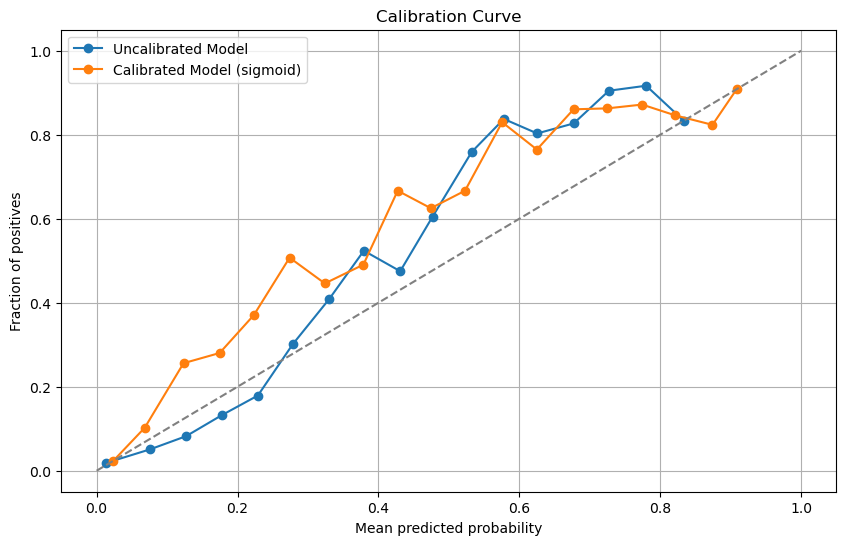

Results Before and After Calibration:
           Before Calibration  After Calibration
Precision            0.815625           0.815152
Recall               0.321033           0.330873
F1 Score             0.460724           0.470691


In [27]:
# Directory of the files
directory_path = r'C:\Users\julia\OneDrive\Documentos\MESTRADO\Aprendizado de Máquina\Trabalho 1\Conjuntos Desbalanceados'

# Load data from the A652.pickle file
file_path = os.path.join(directory_path, 'A652.pickle')

with open(file_path, 'rb') as f:
    X_train, y_train, X_val, y_val, X_test, y_test = pickle.load(f)

# Scale the variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Convert labels to binary
y_train_binary = np.where(y_train != 0, 1, 0).ravel()
y_test_binary = np.where(y_test != 0, 1, 0).ravel()
y_val_binary = np.where(y_val != 0, 1, 0).ravel()

# Train an Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train_binary)

# Calibrate the model using sigmoid method
calibrated_rf = CalibratedClassifierCV(rf_model, method='sigmoid', cv=5)
calibrated_rf.fit(X_train_scaled, y_train_binary)

# Get predicted probabilities for uncalibrated and calibrated models
uncalibrated_probs = rf_model.predict_proba(X_test_scaled)[:, 1]
calibrated_probs = calibrated_rf.predict_proba(X_test_scaled)[:, 1]

# Calibration curve for uncalibrated model
uncalibrated_frac_pos, uncalibrated_mean_pred = calibration_curve(y_test_binary, uncalibrated_probs, n_bins=20)

# Calibration curve for calibrated model
calibrated_frac_pos, calibrated_mean_pred = calibration_curve(y_test_binary, calibrated_probs, n_bins=20)

# Plotting the calibration curves
plt.figure(figsize=(10, 6))
plt.plot(uncalibrated_mean_pred, uncalibrated_frac_pos, marker='o', label='Uncalibrated Model')
plt.plot(calibrated_mean_pred, calibrated_frac_pos, marker='o', label='Calibrated Model (sigmoid)')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration Curve')
plt.legend()
plt.grid(True)
plt.show()

# Predictions before calibration
y_pred_before = rf_model.predict(X_test_scaled)

# Metrics before calibration
precision_before = precision_score(y_test_binary, y_pred_before)
recall_before = recall_score(y_test_binary, y_pred_before)
f1_before = f1_score(y_test_binary, y_pred_before)

# Predictions after calibration
y_pred_after = calibrated_rf.predict(X_test_scaled)

# Metrics after calibration
precision_after = precision_score(y_test_binary, y_pred_after)
recall_after = recall_score(y_test_binary, y_pred_after)
f1_after = f1_score(y_test_binary, y_pred_after)

# Create DataFrame with the results
results = {
    'Before Calibration': [precision_before, recall_before, f1_before],
    'After Calibration': [precision_after, recall_after, f1_after]
}

# Printing results

df_results = pd.DataFrame(results, index=['Precision', 'Recall', 'F1 Score'])
print("Results Before and After Calibration:")
print(df_results)

### Conclusion

The dataset exhibits significant class imbalance, with the majority class (0) heavily outnumbering the minority class (1) in both the training and test sets. Despite attempts to calibrate the model using the sigmoid method, the calibration curves of the calibrated model did not show any significant improvement compared to the uncalibrated model. This lack of improvement suggests that calibration did not effectively address the inherent imbalance in the dataset or enhance the reliability of predicted probabilities.

Furthermore, marginal changes were observed in the performance metrics before and after calibration. The precision remains relatively stable, indicating that the proportion of true positive predictions among all positive predictions did not significantly improve with calibration. Similarly, while there is a slight increase in recall after calibration, it remains relatively low, indicating the model's limited ability to correctly identify all positive instanlance.

# Part 6 - Nested Cross Validation

## Re-using files from part II

In [28]:
# Preparing training and test data
X_diamonds = df_diamonds_encoded.drop(columns='price',axis=1)
y_diamonds = df_diamonds_encoded['price']

# Scale the features using StandardScaler
scaler = StandardScaler()
X_diamonds_scaled = scaler.fit_transform(X_diamonds)

In [29]:
# Defining the number of folds for outer and inner cross-validation
outer_cv = KFold(3)
inner_cv = KFold(3)

# Define the candidate learning algorithms and their parameter value distributions:
models_and_parameters = {
    'Gradient Boosting Regressor': (GradientBoostingRegressor(),
                                    {'n_estimators': [5, 30, 50, 100],
                                     'learning_rate': [0.01, 0.1, 0.2, 0.5],
                                     'max_depth': [3, 5, 10, 15]}),
    'Random Forest Regressor': (RandomForestRegressor(),
                                 {'n_estimators': [20, 50, 100],
                                  'max_depth': [None, 5, 10, 15, 25]})
}

average_scores = dict()

# Track the start time for the entire process
start_time = time.time()

for name, (model, params) in models_and_parameters.items():
    # RandomizedSearchCV for hyperparameter tuning
    search_regressor = RandomizedSearchCV(
        estimator=model, param_distributions=params, n_iter=10,
        cv=inner_cv, scoring='neg_mean_squared_error')

    # Estimate generalization error using cross-validation
    start_cv_time = time.time()  # Track the start time for cross-validation
    cross_val_scores = cross_val_score(search_regressor,
                                       X_diamonds, y_diamonds, cv=outer_cv, scoring='neg_mean_squared_error')
    end_cv_time = time.time()  # Track the end time for cross-validation

    # Calculate the mean MSE across each of the outer_cv's 3 folds
    average_scores[name] = np.mean(cross_val_scores)

    # Printing error summary of models
    error_summary = f'Model: {name}\nMSE in the 3 outer folds: {cross_val_scores}.\nAverage error: {np.mean(cross_val_scores)}'
    print(error_summary)
    print(' ')

    # Calculate and print the time taken for cross-validation
    cv_time_taken = (end_cv_time - start_cv_time)/60
    print(f'Time taken for cross-validation: {cv_time_taken:.2f} minutes')
    print(' ')

# Calculate and print the total time taken for the entire process
total_time_taken = (time.time() - start_time)/60
print(f'Total time taken for the entire process: {total_time_taken:.2f} minutes')
print(' ')

print('Average score across the outer folds: ', average_scores)

space_line = '\n' + '-' * 100 + '\n'
print(f'{space_line}Choosing best model and refitting using the whole dataset{space_line}')

# Select the best model based on the min average score
# Please note that the max value in a range of negative values is the minimum value

best_model_name = max(average_scores, key=average_scores.get) #finds the key (model name) associated with the maximum value (highest average score) 
                                                              #in the average_scores dictionary

best_model_avg_score = average_scores[best_model_name] #accesses the value associated with the key best_model_name in the average_scores dict

# Get the best model and its associated parameter grid
best_model, best_model_params = models_and_parameters[best_model_name] #This retrieves the value associated with the key best_model_name 
                                                                       #from the models_and_parameters dictionary defined above

# Refit the best model on the whole dataset
final_regressor = RandomizedSearchCV(best_model, best_model_params, n_iter=10, cv=inner_cv)
start_refit_time = time.time()  # Track the start time for refitting
final_regressor.fit(X_diamonds, y_diamonds)
end_refit_time = time.time()  # Track the end time for refitting

# Calculate and print the time taken for refitting
refit_time_taken = (end_refit_time - start_refit_time)/60
print(f'Time taken for refitting: {refit_time_taken:.2f} minutes')
print(' ')

print(f'Best model: \n\t{best_model}\n')
print(f'Estimation of its generalization error (negative mean squared error):\n\t{best_model_avg_score}\n')
print(f'Best parameter choice for this model: \n\t{final_regressor.best_params_}\n(According to cross-validation `{inner_cv}` on the whole dataset).')

Model: Gradient Boosting Regressor
MSE in the 3 outer folds: [ -1126358.11142499 -15665208.06872835   -657601.22249304].
Average error: -5816389.134215459
 
Time taken for cross-validation: 7.33 minutes
 
Model: Random Forest Regressor
MSE in the 3 outer folds: [ -1984458.09122385 -16623458.62314391   -341573.82012958].
Average error: -6316496.84483245
 
Time taken for cross-validation: 17.07 minutes
 
Total time taken for the entire process: 24.39 minutes
 
Average score across the outer folds:  {'Gradient Boosting Regressor': -5816389.134215459, 'Random Forest Regressor': -6316496.84483245}

----------------------------------------------------------------------------------------------------
Choosing best model and refitting using the whole dataset
----------------------------------------------------------------------------------------------------

Time taken for refitting: 4.30 minutes
 
Best model: 
	GradientBoostingRegressor()

Estimation of its generalization error (negative mean 

### Conclusion

**Model Performance**

- **Gradient Boosting Regressor:** The Gradient Boosting Regressor demonstrates consistent performance with an average mean squared error (MSE) of approximately -5,816,389.13. The MSE values across the 3 outer folds are [-1,126,358.11, -15,665,208.07, -657,601.22], indicating reliability in predictions across different datasets.
  
- **Random Forest Regressor:** While still performing reasonably well, the Random Forest Regressor shows a slightly higher average MSE of around -6,316,496.84. The MSE values across the 3 outer folds are [-1,984,458.09, -16,623,458.62, -341,573.82]. However, the model remains competitive.

**Computational Efficiency**

- **Cross-validation Time:**
  - Gradient Boosting Regressor: 7.33 minutes
  - Random Forest Regressor: 17.07 minutes

- **Refitting Time:** 
  - 4.30 minutes

**Best Model Selection**

The Gradient Boosting Regressor emerges as the preferred choice due to its lower average MSE and shorter computational time.

**Selected Model Details**

- **Model:** GradientBoostingRegressor()
- **Estimation of Generalization Error (MSE):** -5,816,389.13
- **Best Parameter Choice:** {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.2}
- **Cross-validation Method:** KFold(n_splits=3, random_state=None, shuffle=False)

In summary, the Gradient Boosting Regressor offers reliability in predictions and computational efficiency, making it the optimal choice for this regression task.